In [3]:
#import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


#memanggil librayry

In [40]:
#memanggil library yang data
wine = datasets.load_wine()
print(type(wine))

<class 'sklearn.utils.Bunch'>


In [41]:
print (wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [44]:
print(wine.data.shape)

(178, 13)


In [45]:
#konversi dataset ke dalam dataframe
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [46]:
x = wine.data
y = wine.target

df = pd.DataFrame(x, columns=wine.feature_names)

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [49]:
#memanggil knn
knn = KNeighborsClassifier(n_neighbors=6,weights='uniform',algorithm='auto',metric='euclidean')

#fiting model
X_train = wine['data']
y_train = wine['target']

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [50]:
#visualisasi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [63]:
#call dataset
wine  = datasets.load_wine()

#membagi data menjadi 2 dimensi
x = wine.data[:, :2]
y = wine.target

#mengatur warna
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000','#00FF00','#0000FF'])

knn = neighbors.KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x,y)

x_min, x_max = x[:, 0].min()-1,x[:,0].max()+1
y_min, y_max = x[:, 0].min()-1,x[:,0].max()+1

xx,yy = np.meshgrid(np.linspace(x_min,x_max),np.linspace(y_min,y_max))

In [64]:
z = knn.predict(np.c_[xx.ravel(),yy.ravel()])


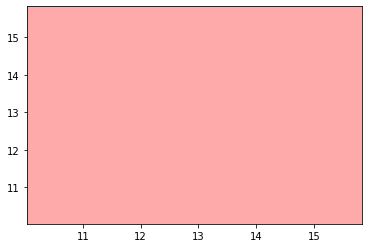

In [65]:

#memasukan hasil ke dalam color plot
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z, cmap=cmap_light)

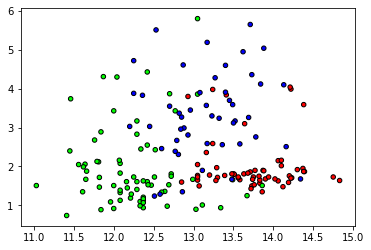

In [66]:
#plot training points
plt.scatter(x[:,0],x[:,1], c=y, cmap=cmap_bold,edgecolor='k', s=20)

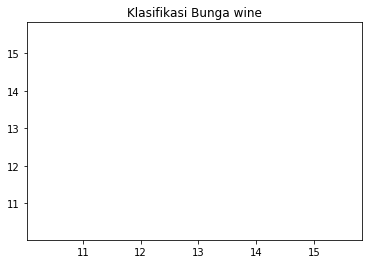

In [67]:
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Klasifikasi Bunga wine")

#menampilkan plot
plt.show()
